In [1]:
!pip install --upgrade opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 45.3/45.3 MB 2.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
pwd

'C:\\Users\\rksah\\Downloads'

In [4]:
#data path
trainpath = 'C:\\Users\\rksah\\Downloads\\Skin_Cancer\\train'#Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\rksah\\Downloads\\Skin_Cancer\\test'#please give the path where you are saving the test folder.

In [5]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])
      

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


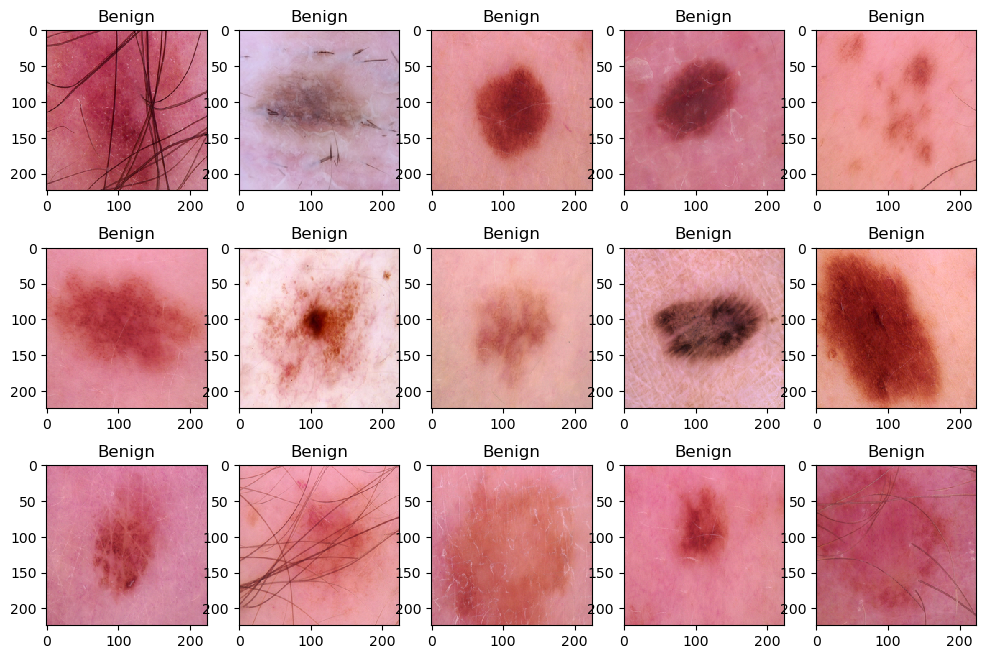

In [6]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [7]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


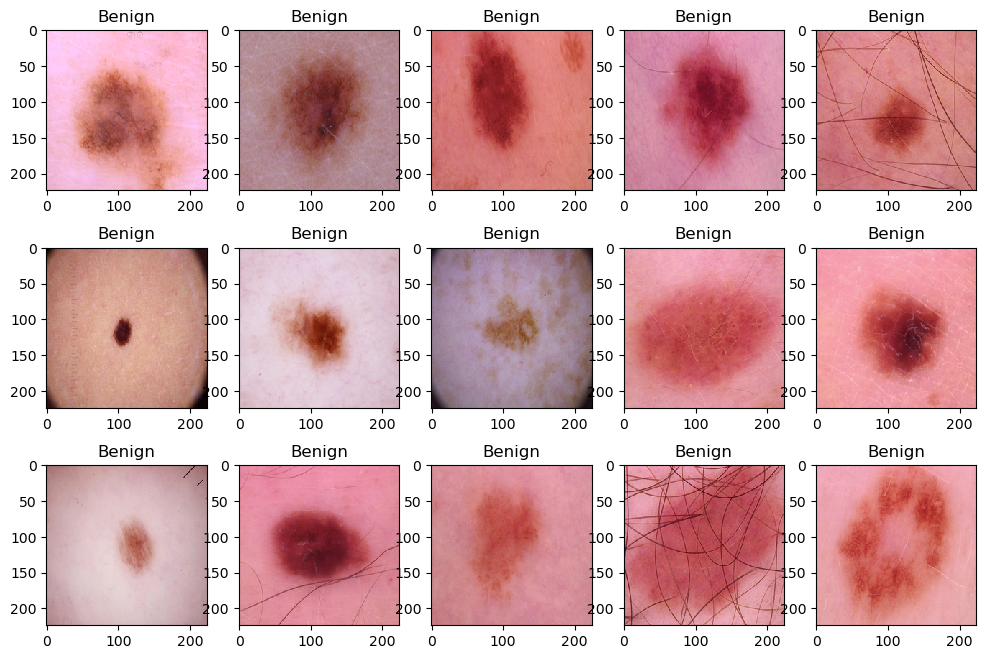

In [8]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [9]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [10]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [11]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [12]:
y_train1.shape,y_test1.shape

((50,), (50,))

# Used a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and adding three dense layers having 64, 32 and 2 neurons with relu, sigmoid and softmax activation functions respectively for classifying the two class Skin_Cancer RGB dataset

In [13]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()



58889256/58889256 [==============================] - 18s 0us/step


In [14]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [15]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10


10/10 [==============================] - 56s 6s/step - loss: 0.2154 - accuracy: 0.6400 - val_loss: 0.2114 - val_accuracy: 0.6400
Epoch 2/10
10/10 [==============================] - 53s 6s/step - loss: 0.1404 - accuracy: 0.7800 - val_loss: 0.1782 - val_accuracy: 0.7000
Epoch 3/10
10/10 [==============================] - 53s 6s/step - loss: 0.0932 - accuracy: 0.8800 - val_loss: 0.1503 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 53s 6s/step - loss: 0.0621 - accuracy: 0.9600 - val_loss: 0.1434 - val_accuracy: 0.8200
Epoch 5/10
10/10 [==============================] - 54s 6s/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 0.1275 - val_accuracy: 0.8800
Epoch 6/10
10/10 [==============================] - 55s 6s/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.8800
Epoch 7/10
10/10 [==============================] - 53s 6s/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.8600
Epoch 8/10
10/10 [

# Used a pretrained VGG-16 model on Imagenet dataset by removing the top fully connected layers and extracting the deep features and modelling them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset

In [16]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [17]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 29s 10s/step


In [66]:
from sklearn.ensemble import RandomForestClassifier
def testing():
    rf=RandomForestClassifier(n_estimators = 20)
    rf=rf.fit(train_feature_16,y_train)
    train_pred=rf.predict(train_feature_16)
    test_pred=rf.predict(test_feature_16)
    print("Train Accuracy Score",accuracy_score(train_pred,y_train))
    print("Test Accuracy Score",accuracy_score(test_pred,y_test))
for i in range(5):
    print(i)
    testing()

0
Train Accuracy Score 1.0
Test Accuracy Score 1.0
1
Train Accuracy Score 1.0
Test Accuracy Score 1.0
2
Train Accuracy Score 1.0
Test Accuracy Score 1.0
3
Train Accuracy Score 1.0
Test Accuracy Score 1.0
4
Train Accuracy Score 1.0
Test Accuracy Score 1.0


# Used a pretrained VGG-19 model on Imagenet dataset by removing the top fully connected layers and extracting the deep features and modelling them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset

In [19]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

80134624/80134624 [==============================] - 23s 0us/step


In [20]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

2/2 [==============================] - 34s 12s/step


In [67]:
from sklearn.ensemble import RandomForestClassifier
def testing():
    rf=RandomForestClassifier(n_estimators = 10)
    rf=rf.fit(train_feature_19,y_train)
    train_pred=rf.predict(train_feature_19)
    test_pred=rf.predict(test_feature_19)
    print("Train Accuracy Score",accuracy_score(train_pred,y_train))
    print("Test Accuracy Score",accuracy_score(test_pred,y_test))
for i in range(5):
    print(i)
    testing()

0
Train Accuracy Score 1.0
Test Accuracy Score 0.9866666666666667
1
Train Accuracy Score 1.0
Test Accuracy Score 1.0
2
Train Accuracy Score 1.0
Test Accuracy Score 0.96
3
Train Accuracy Score 1.0
Test Accuracy Score 0.9733333333333334
4
Train Accuracy Score 1.0
Test Accuracy Score 1.0


# fused the deep features extracted using VGG-16 and VGG-19 and modelled them using a Random Forest classifier for classifying the two class Skin_Cancer RGB dataset

In [22]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [65]:
from sklearn.ensemble import RandomForestClassifier
def testing():
    rf=RandomForestClassifier(n_estimators = 10)
    rf=rf.fit(final_train,y_train)
    train_pred=rf.predict(final_train)
    test_pred=rf.predict(final_test)
    print("Train Accuracy Score",accuracy_score(train_pred,y_train))
    print("Test Accuracy Score",accuracy_score(test_pred,y_test))
for i in range(5):
    testing()

Train Accuracy Score 1.0
Test Accuracy Score 0.96
Train Accuracy Score 1.0
Test Accuracy Score 1.0
Train Accuracy Score 1.0
Test Accuracy Score 1.0
Train Accuracy Score 1.0
Test Accuracy Score 0.96
Train Accuracy Score 1.0
Test Accuracy Score 0.92


In [ ]:
Employ the following ML models instead of Random Forest and Compare the Results
XGBoost
Support Vector Classifier
Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(final_train,y_train)
train_pred=dtc.predict(final_train)
test_pred=dtc.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.7
